# Análisis Exploratorio de Datos Principiante

# Preparando el Entorno

1.- Importación de librerías

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
import codecs
from IPython.display import HTML
from subprocess import check_output

2.- Invocar el DataFrame

In [103]:
response = pd.read_csv("multipleChoiceResponses.csv",encoding="ISO-8859-1")

3.-Revisar Los primeros Elementos de la tabla

In [104]:
#Tenemos 16716 entradas con 228 variables o entradas. 
response["CompensationAmount"].sample(12)

4215        NaN
4880        NaN
11540       NaN
6026     50,000
10120       NaN
15162       NaN
6041      87000
1705        NaN
1061     110000
14886       NaN
1686        NaN
197      305000
Name: CompensationAmount, dtype: object

# Principales Análisis Básicos

* Los Análisis Básicos suelen hacer sobre el total de registros, podemos referirnos a su procedencia, su edad o alguna característica vital del conjunto de Datos. 

1.- ¿Cuál es el número total de Encuestados?

In [105]:
#Para esto podemos invocar un componente de la dimensión del Dataframe
total_encuestados = response.shape[0]
print("La Cantidad total de Encuestados es",total_encuestados)

La Cantidad total de Encuestados es 16716


2.- ¿Cúal es el número total de países encuestados?

In [106]:
#En este caso nos interesa los datos unicos que se presentan en la columna país, de esta forma podemos extraer su cantidad. 
numero_total_paises = response["Country"].nunique()
print("La Cantidad total de países encuestados es:",numero_total_paises)

La Cantidad total de países encuestados es: 52


3.-¿Cuál es el País con Mayor Número de Encuestados?

In [107]:
#Nuevamente trabajamos con la columna de paises, donde debemos obtener cual es el país con mayor cantidad de encuestados, entonces debemos contar.

#El primero siempre será el mayor, obtenemos el indice, osea el país
pais_mayor_encuestados = response["Country"].value_counts().index[0]

#En cambio si deseamos obtener la cantidad especificamente
cantidad_mayor_encuestados = response["Country"].value_counts()[0]

#Respuesta:
print("El País con mayor cantidad de encuestados es:",pais_mayor_encuestados+",","con una cantidad de",cantidad_mayor_encuestados,"personas")


El País con mayor cantidad de encuestados es: United States, con una cantidad de 4197 personas


3.1.- ¿Cuál sería entonces el País con Menor Número de encuestados?

In [108]:
#Trabajamos con la columna "Country"
pais_menor_encuestados = response["Country"].value_counts().index[-1]

cantidad_menor_encuestados = response["Country"].value_counts()[-1]

cantidad_menor_encuestados

print("El País con menor cantidad de encuestados es:",pais_menor_encuestados+",","con una cantidad de",cantidad_menor_encuestados,"personas")


El País con menor cantidad de encuestados es: Chile, con una cantidad de 51 personas


In [109]:
#Comprobación de las Preguntas Anteriores. [3.0]
response["Country"].value_counts().head(1)

United States    4197
Name: Country, dtype: int64

In [110]:
#Comprobación de las Preguntas Anteriores.[3.1]
response["Country"].value_counts().tail(1)


Chile    51
Name: Country, dtype: int64

4.-¿Cuál es el Participante más Joven y Longevo que fue sometido a la encuesta?

In [111]:
#Para trabajar sobre la juventud o longevidad debemos trabajar con la columna ["Age"]

#Usamos sencillamente las funciones min y max en la columna correspondiente. 
encuestado_mas_joven = response["Age"].min()
encuestado_mas_longevo = response["Age"].max()
print("El encuestado más joven tiene la edad de:",encuestado_mas_joven)
print("El encuestado mas longevo tiene la edad de:",encuestado_mas_longevo)


El encuestado más joven tiene la edad de: 0.0
El encuestado mas longevo tiene la edad de: 100.0


Nota: Es posible que en este apartado exista un error en los datos, ¿qué valor podría tener un encuestado de 0 años? 
A parte, también podemos observar como el encuestado más longevo tiene una edad de 100 años y aplicando esto al contexto de la tabla su información a parte de omitble, de no tratarse puede provocar ciertos problemas. 

# Primeras Gráficas - División por Géneros

Procedemos a crear nuestras tablas según los géneros con los cuales se identifican los encuestados

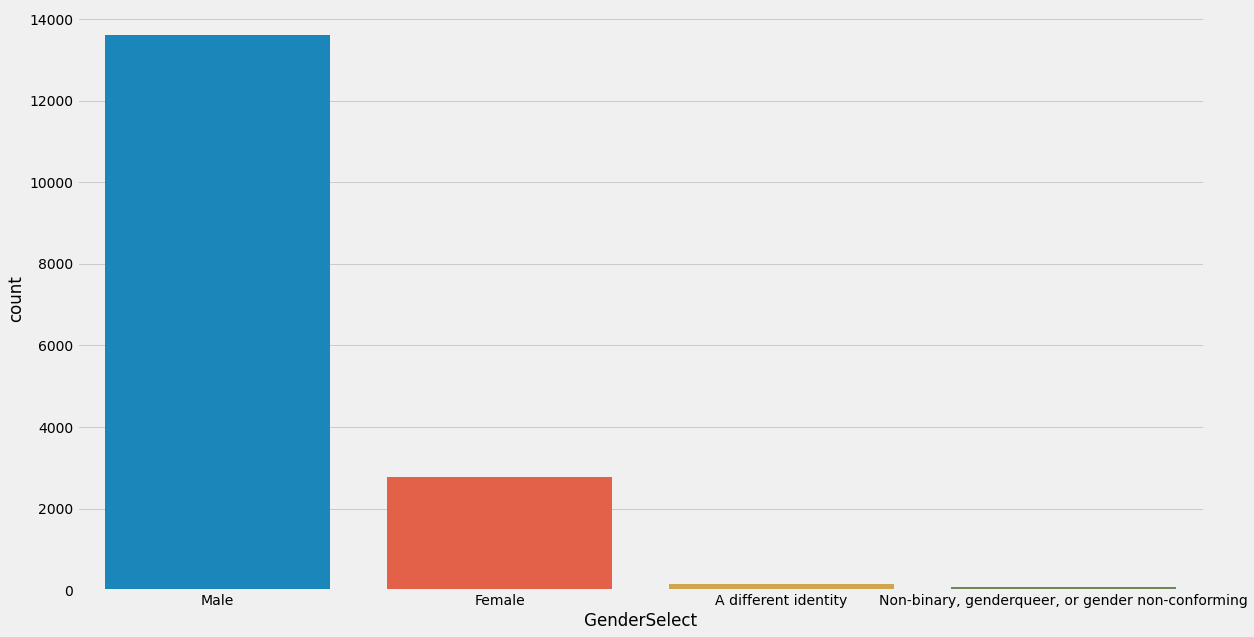

In [112]:
#Invocamos a la librería principal para gráfico de este estilo matplotlib

#Primero creamos nuestro entorno de trabajo con un "figsize" de 18x10 en cuanto a dimensión 
plt.subplots(figsize = (18,10))
#Obtenemos los valores para nuestra gráfica de nuestra gráfica 

#Es un gráfico de barras invertido, donde enfrentamos a los generos vs su cantidad. 

#Básicamente los estamos catalogando, x nos da el tipo mientras que orden tiene las categorías.
sns.countplot(x=response["GenderSelect"], order=response["GenderSelect"].value_counts().index)
plt.show()

* Podemos observar que una aplastante mayoría de los encuestados son de género masculino, realmente se desconoce el motivo exacto de este fenómeno pero puede deberse al momento o lugar en ensencia en el que se llevó a cabo la encuesta. 

# Primeras Gráficas - Top 15 países que presentan mayor cantidad de encuestados. 

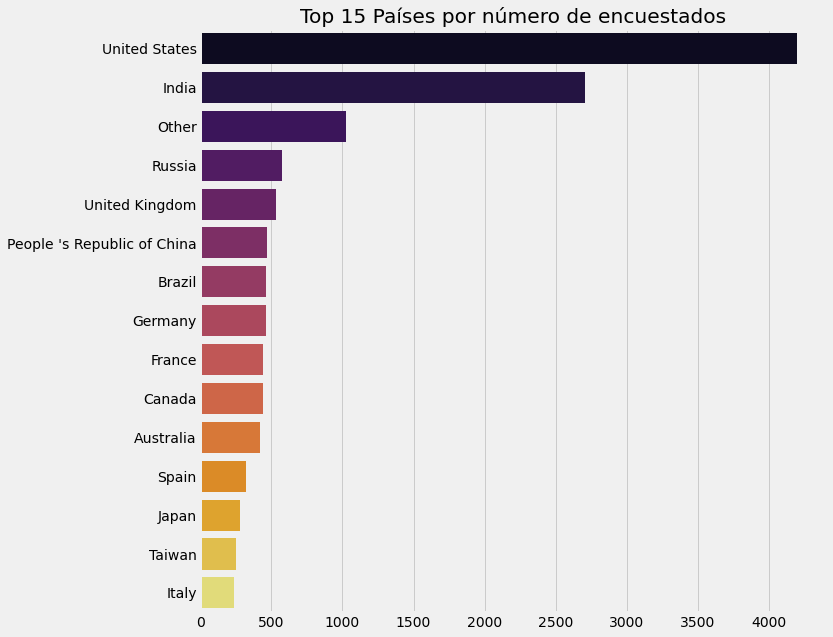

In [113]:
#Primero debemos limitar nuestra muestra para obtener solo 15 paises en nuestra gráfica.
#Lo único extra que deberíamos hacer es convertir nuestro filtro en un dataframe.
res_top_15 = response["Country"].value_counts()[:15].to_frame()
sns.barplot(res_top_15["Country"], res_top_15.index, palette="inferno")
plt.title("Top 15 Países por número de encuestados")
plt.xlabel("")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()
